<a href="https://colab.research.google.com/github/FranziskoB/Analise_Fatorial_PCA/blob/main/Py_Analise_Fatorial_PCA_Exemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises fatoriais e PCA

Dataset contém dados de indicadores de desenvolvimento de paises em 2 anos distintos. Vai ser criado um ranking apartir dos dados para efeito de comparação entre os resultados obtidos nos dois anos e será verificado se houve alguma mudança no ranking de paises de um ano para o outro.



##Importando bibliotecas

In [ ]:
!pip install spicy
!pip install factor_analyzer
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Carregamento da base de dados

In [ ]:
base_indicador = pd.read_excel("https://github.com/FranziskoB/Analise_Fatorial_PCA/raw/main/Dados/indicador_pa%C3%ADs.xlsx")
base_indicador.head(5)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8


##Informações sobre as variáveis

In [ ]:
print(base_indicador.info())
print(base_indicador.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   país         50 non-null     object 
 1   cpi1         50 non-null     float64
 2   violência1   50 non-null     float64
 3   pib_capita1  50 non-null     float64
 4   escol1       50 non-null     float64
 5   cpi2         50 non-null     float64
 6   violência2   50 non-null     float64
 7   pib_capita2  50 non-null     float64
 8   escol2       50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.6+ KB
None
            cpi1  violência1   pib_capita1    escol1       cpi2  violência2  \
count  50.000000   50.000000     50.000000  50.00000  50.000000   50.000000   
mean    5.518000    7.092374  15091.204106  10.25800   5.500000    6.645060   
std     2.374154   13.207847  12281.213696   2.34626   2.361079   12.592332   
min     1.900000    0.459600    794.801300   6.10000   2.000000

##Matriz de correlaçãoes
Primero ano

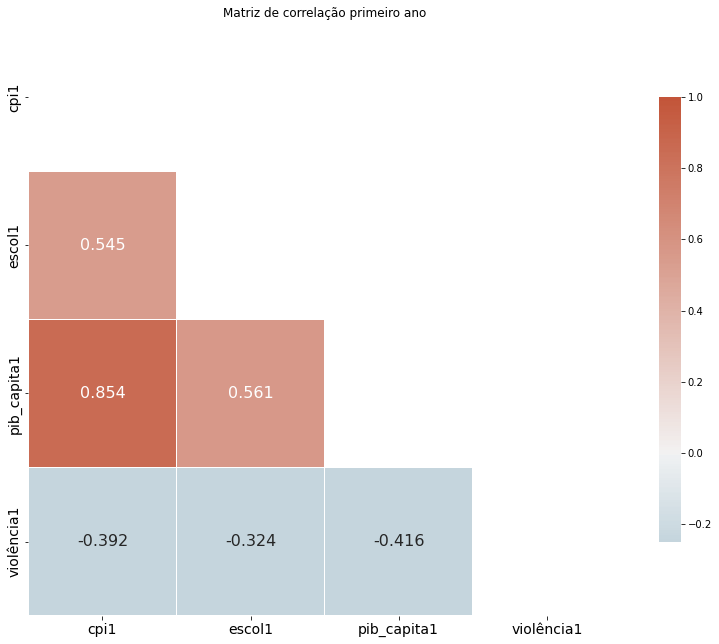

In [ ]:
base_indicador_pca_1 = base_indicador[['cpi1','escol1','pib_capita1','violência1']]
corr = base_indicador_pca_1.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(base_indicador_pca_1.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação primeiro ano')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

Segundo ano

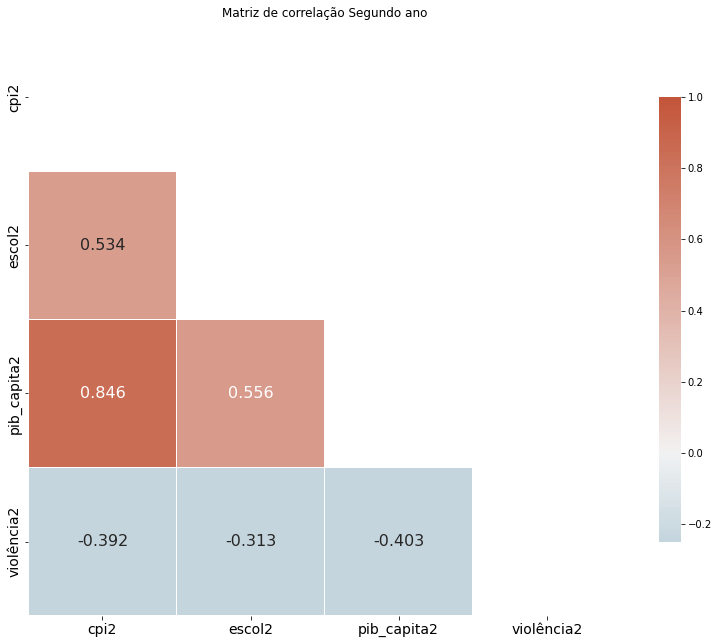

In [ ]:
base_indicador_pca_2 = base_indicador[['cpi2','escol2','pib_capita2','violência2']]
corr = base_indicador_pca_2.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(base_indicador_pca_2.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação Segundo ano')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

##Teste de Bartlett

In [ ]:
bartlett, p_value = calculate_bartlett_sphericity(base_indicador_pca_2)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')#Ano 1

Bartlett statistic: 86.48323533730881
p-value : 1.6265142943134136e-16


In [ ]:
bartlett, p_value = calculate_bartlett_sphericity(base_indicador_pca_2)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')#Ano 2

Bartlett statistic: 86.48323533730881
p-value : 1.6265142943134136e-16


##PCA

Definindo a PCA (procedimento preliminar)

In [ ]:
fa1 = FactorAnalyzer()
fa1.fit(base_indicador_pca_1)
fa2 = FactorAnalyzer()
fa2.fit(base_indicador_pca_2)

FactorAnalyzer(rotation_kwargs={})

Obtendo os Eigenvalues (autovalores)

In [ ]:
ev1, v1 = fa1.get_eigenvalues()#Ano 1
print(ev1)

[2.5887211  0.72989475 0.53565237 0.14573178]


In [ ]:
ev2, v2 = fa2.get_eigenvalues()#Ano 2
print(ev2)

[2.56596625 0.73740672 0.54309917 0.15352786]


Critério de Kaiser : 
* Verificar autovalores com valores maiores que 1
* Existem 1 componente acima de 1

Parametrizando a PCA para dois fatores (autovalores > 1)


In [ ]:
fa1.set_params(n_factors = 1, method = 'principal', rotation = None)
fa1.fit(base_indicador_pca_1)#Ano 1

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

In [ ]:
fa2.set_params(n_factors = 1, method = 'principal', rotation = None)
fa2.fit(base_indicador_pca_2)#Ano 2

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

Eigenvalues, variâncias e variâncias acumulada


In [ ]:
eigen_fatores1 = fa1.get_factor_variance()
eigen_fatores1

tabela_eigen1 = pd.DataFrame(eigen_fatores1)
tabela_eigen1.columns = [f"Ano 1 Fator {i+1}" for i, v in enumerate(tabela_eigen1.columns)]
tabela_eigen1.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen1 = tabela_eigen1.T
print(tabela_eigen1)#Ano 1

               Autovalor  Variância  Variância Acumulada
Ano 1 Fator 1   2.588721    0.64718              0.64718


In [ ]:
eigen_fatores2 = fa2.get_factor_variance()
eigen_fatores2

tabela_eigen2 = pd.DataFrame(eigen_fatores2)
tabela_eigen2.columns = [f"Ano 2 Fator {i+1}" for i, v in enumerate(tabela_eigen2.columns)]
tabela_eigen2.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen2 = tabela_eigen2.T
print(tabela_eigen2)#Ano 2

               Autovalor  Variância  Variância Acumulada
Ano 2 Fator 1   2.565966   0.641492             0.641492


Resultados dos fatores para as observações do dataset (predict)

In [ ]:
predict_fatores1= pd.DataFrame(fa1.transform(base_indicador_pca_1))
predict_fatores1.columns =  [f"Ano 1 Fator {i+1}" for i, v in enumerate(predict_fatores1.columns)]
print(predict_fatores1.head(5))#Ano 1

   Ano 1 Fator 1
0       0.561206
1      -1.071493
2      -0.996483
3      -0.825835
4       1.342877


In [ ]:
predict_fatores2= pd.DataFrame(fa2.transform(base_indicador_pca_2))
predict_fatores2.columns =  [f"Ano 2 Fator {i+1}" for i, v in enumerate(predict_fatores2.columns)]
print(predict_fatores2.head(5))#Ano 2

   Ano 2 Fator 1
0       0.539585
1      -1.076836
2      -1.000343
3      -0.834912
4       1.360426


Adicionando ao dataset 


In [ ]:
base_indicador = pd.concat([base_indicador.reset_index(drop=True), predict_fatores1 ,predict_fatores2], axis=1)
base_indicador.head(5)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Ano 1 Fator 1,Ano 2 Fator 1
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8,0.561206,0.539585
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,-1.071493,-1.076836
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8,-0.996483,-1.000343
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1,-0.825835,-0.834912
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,1.342877,1.360426


##Criando um ranking

In [ ]:
base_indicador['Ranking ano 1'] = 0

for index, item in enumerate(list(tabela_eigen1.index)):
    variancia = tabela_eigen1.loc[item]['Variância']

    base_indicador['Ranking ano 1'] = base_indicador['Ranking ano 1'] + base_indicador[tabela_eigen1.index[index]]*variancia
    
print(base_indicador.head(5))

        país  cpi1  violência1  pib_capita1  escol1  cpi2  violência2  \
0  Argentina   2.9      5.8836   10749.3193     9.7   2.9      5.2538   
1  Australia   8.7      0.7800   25190.8398    11.8   8.7      0.7800   
2    Austria   7.9      0.7077   26642.9941    11.8   7.9      0.8094   
3    Belgium   7.1      1.6349   24550.3965    12.0   7.1      1.3524   
4     Brazil   3.7     25.0808    4716.6143     6.7   3.7     24.4085   

   pib_capita2  escol2  Ano 1 Fator 1  Ano 2 Fator 1  Ranking ano 1  
0   11601.6299     9.8       0.561206       0.539585       0.363201  
1   25306.8242    11.9      -1.071493      -1.076836      -0.693449  
2   27266.4043    11.8      -0.996483      -1.000343      -0.644904  
3   24733.6270    12.1      -0.825835      -0.834912      -0.534464  
4    4803.3984     6.8       1.342877       1.360426       0.869084  


In [ ]:
base_indicador['Ranking ano 2'] = 0

for index, item in enumerate(list(tabela_eigen2.index)):
    variancia = tabela_eigen2.loc[item]['Variância']

    base_indicador['Ranking ano 2'] = base_indicador['Ranking ano 2'] + base_indicador[tabela_eigen2.index[index]]*variancia
    
print(base_indicador.head(5))

        país  cpi1  violência1  pib_capita1  escol1  cpi2  violência2  \
0  Argentina   2.9      5.8836   10749.3193     9.7   2.9      5.2538   
1  Australia   8.7      0.7800   25190.8398    11.8   8.7      0.7800   
2    Austria   7.9      0.7077   26642.9941    11.8   7.9      0.8094   
3    Belgium   7.1      1.6349   24550.3965    12.0   7.1      1.3524   
4     Brazil   3.7     25.0808    4716.6143     6.7   3.7     24.4085   

   pib_capita2  escol2  Ano 1 Fator 1  Ano 2 Fator 1  Ranking ano 1  \
0   11601.6299     9.8       0.561206       0.539585       0.363201   
1   25306.8242    11.9      -1.071493      -1.076836      -0.693449   
2   27266.4043    11.8      -0.996483      -1.000343      -0.644904   
3   24733.6270    12.1      -0.825835      -0.834912      -0.534464   
4    4803.3984     6.8       1.342877       1.360426       0.869084   

   Ranking ano 2  
0       0.346139  
1      -0.690781  
2      -0.641711  
3      -0.535589  
4       0.872702  


In [ ]:
base_indicador=base_indicador.sort_values(by='Ranking ano 1')
base_indicador['Classificacao ano 1']=base_indicador.reset_index().drop('index',axis=1).index+1
base_indicador=base_indicador.sort_values(by='Ranking ano 2')
base_indicador['Classificacao ano 2']=base_indicador.reset_index().drop('index',axis=1).index+1

In [ ]:
base_indicador.head(5) # Top 5

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Ano 1 Fator 1,Ano 2 Fator 1,Ranking ano 1,Ranking ano 2,Classificacao ano 1,Classificacao ano 2
29,Norway,8.6,0.8763,39970.2930,13.5,8.6,0.6321,40034.8516,13.6,-1.696403,-1.705608,-1.097878,-1.094133,2,1
42,Switzerland,9.0,0.8976,38826.8438,13.4,8.7,0.9867,39170.4141,13.5,-1.709531,-1.676204,-1.106375,-1.075271,1,2
41,Sweden,9.2,1.0819,32631.1934,12.3,9.2,0.8965,33630.2461,12.4,-1.418209,-1.453431,-0.917837,-0.932364,4,3
11,Denmark,9.3,0.6282,30667.8242,12.8,9.3,1.0043,30860.1289,12.8,-1.447219,-1.436972,-0.936612,-0.921806,3,4
21,Japan,7.7,0.4763,39971.7891,12.1,7.8,0.4394,39578.0742,12.2,-1.394655,-1.398860,-0.902594,-0.897357,5,5
